In [0]:
from google.colab import drive

In [3]:
ROOT = "/content/drive"
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
HOME = ROOT + "/My Drive/Colab Notebooks"
HOME

'/content/drive/My Drive/Colab Notebooks'

In [14]:
cd {HOME}

/content/drive/My Drive/Colab Notebooks


In [15]:
cd dw-matrix

/content/drive/My Drive/Colab Notebooks/dw-matrix


In [16]:
!cat .gitignore

data


In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv("data/df-usd-99.csv", low_memory=False)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,18280,9422,AVpfziyELJeJML43ED42,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,2161,662,"B00JRBST9M,B00REJ33U4,B00DKE97SE",66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,18263,1856,Nike,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,18280,1170,"All Men's Shoes,Shoes,Men's Shoes,Clothing",3698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
colors,10344,2080,Black,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateadded,18280,7425,2015-08-18T16:43:54Z,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateupdated,18280,7509,2016-02-25T20:49:59Z,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptions,9704,5057,"[{""dateSeen"":[""2016-08-23T11:50:58Z""],""sourceU...",34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimension,2968,275,1 in x 1 in x 1 in,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.prices_merchant.unique()

array([nan, 'UnbeatableSale - Walmart.com',
       'SIM Supply Inc - Walmart.com', 'ApparelSave - Walmart.com',
       'BHFO, Inc. - Walmart.com', 'STAND UP Ranchers - Walmart.com',
       'Designer Studio  Inc. - Walmart.com',
       'Virtual Exchanges Inc - Walmart.com', 'Unique Bargains',
       'MensBodega - Walmart.com', '773adam773adam - Ebay.com',
       'Shopping Blitz - Walmart.com', 'Brands R US - Walmart.com',
       'Bestpricecenter.com', 'AreaTrend - Walmart.com', 'Liquidators',
       'SHOEBACCA LTD. - Walmart.com', 'Street Moda - Walmart.com',
       'redseafashion - Ebay.com', 'Bigsales', 'Zoro - Walmart.com',
       'winnsports - Ebay.com', 'ProSales', 'New Occidental', 'Kmart',
       'Shoenerds - Walmart.com', 'RBX Active - Walmart.com',
       'Eyewear & Co. - Walmart.com', 'Supply the Home - Walmart.com',
       'ProMax Commerce - Walmart.com', 'UnbeatableSale.com, Inc.',
       'Sears.com', 'Shoplet - Walmart.com', 'Upgrab - Walmart.com',
       'shoezoo - Walmart

In [19]:
df.categories.unique()

array(["Clothing,Shoes,Men's Shoes,All Men's Shoes",
       "All Men's Shoes,Shoes,Men's Shoes,Clothing",
       "Men's Casual Shoes,Shoes,Men's Shoes,Clothing", ...,
       "Clothing, Shoes & Accessories,Men's Clothing,Jeans,See more Men's Levi's 505 Straight Leg Regular Fit Jean...",
       'Shoes & Handbags,Shoes,Men,Athletic,Tennis',
       'Sports,Clothing, Shoes & Jewelry,Men,Clothing,Jackets & Coats,Active & Performance,Shells'],
      dtype=object)

In [20]:
df.features.unique()

array(['[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men\'s Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]',
       '[{"key":"Gender","value":["Men"]},{"key":"Color","value":["Black"]},{"key":"Shipping Weight (in pounds)","value":["0.45"]},{"key":"Condition","value":["New"]},{"key":"Brand","value":["SERVUS BY HONEYWELL"]},{"key":"manufacturer_part_number","value":["ZSR101BLMLG"]}]',
       '[{"key":"Heel Height","value":["Low (3/4 in. to 1 1/2 in.)"]},{"key":"Material","value":["Synthetic"]},{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["10"]},{"key":"Fabric Material","value":["Synthetic"]},{"key":"Color","value":["Gray"]},{"key":"Casual & Dress Shoe Style","value":["Loafers & Slip Ons"]},{"key":"Manufacturer Part Number","value":["GLM02-077"]},{"key":"Brand","value":["NATIVE"]},{"key":"Age Group","value":["Adult"]},{"

In [21]:
df.shape

(18280, 48)

In [22]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [23]:
y_true = df["prices_amountmin"]
mean_price = np.mean(y_true)
mean_price

93.53952188183217

In [24]:
y_true

0        39.89
1        51.99
2        40.02
3        50.31
4        46.26
         ...  
18275    29.95
18276    64.95
18277    32.48
18278    31.48
18279    72.00
Name: prices_amountmin, Length: 18280, dtype: float64

In [25]:
y_pred = y_true.shape[0]*[mean_price]
mean_absolute_error(y_true, y_pred)

63.968341227870624

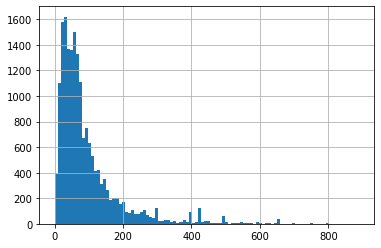

In [26]:
df["prices_amountmin"].hist(bins=100)

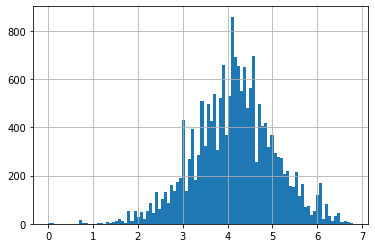

In [27]:
np.log1p(df["prices_amountmin"]).hist(bins=100)

In [28]:
y_pred = y_true.shape[0]*[df["prices_amountmin"].median()]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [29]:
exp_of_mean_of_log = np.expm1 (np.mean( np.log1p (y_true)))
y_pred = y_true.shape[0]*[exp_of_mean_of_log]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ["brand_cat"]
X = df[ feats ]
y = df["prices_amountmin"].values

In [32]:
model = DecisionTreeRegressor(criterion="mae", 
                              ccp_alpha=0.005)                              

c_score = -cross_val_score(estimator=model, X=X, y=y, scoring="neg_mean_absolute_error")               

print(np.mean(c_score))
print(np.std(c_score))

46.32309491247265
3.2052849307178106


In [0]:
def score_model(model, feats):    
    X = df[ feats ]
    y = df["prices_amountmin"].values
    c_score = -cross_val_score(estimator=model, X=X, y=y, scoring="neg_mean_absolute_error")               
    return np.mean(c_score), np.std(c_score)

In [52]:
model = DecisionTreeRegressor(criterion="mae", 
                              ccp_alpha=0.01)                              
feats = ["brand_cat"]

score_model(model, feats)

(46.74170240700219, 3.3121962370881115)

In [0]:
df["manufacturer_cat"] = df['manufacturer'].factorize()[0]
df["categories_cat"] = df['categories'].factorize()[0]
df["prices_merchant_cat"] = df['prices_merchant'].factorize()[0]

In [54]:
feats = ["manufacturer_cat"]
score_model(model, feats)

(53.98929704595186, 4.088998632192263)

In [55]:
feats = ["categories_cat"]
score_model(model, feats)

(50.5003090809628, 2.1109473663690954)

In [56]:
feats = ["prices_merchant_cat"]
score_model(model, feats)

(51.72736269146608, 4.894055647777446)

In [57]:
feats = ["brand_cat","manufacturer_cat"]
score_model(model, feats)

(47.795960339168495, 3.430541424744366)

In [58]:
feats = ["brand_cat","categories_cat"]
score_model(model, feats)

(49.10941712253829, 1.802623140849298)

In [59]:
feats = ["brand_cat","manufacturer_cat","categories_cat"]
score_model(model, feats)

(49.24630935448578, 2.3941843934855767)

In [60]:
feats = ["brand_cat","manufacturer_cat","prices_merchant_cat","categories_cat"]
score_model(model, feats)

(49.76762363238511, 3.169043520840606)